# 1. 2D Patch Extraction from 3D Volume

In [1]:
# Turn off warnings
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import segyio
import os

In [3]:
filePath_noisy = '/home/roderickperez/Documents/DS_Projects_Ubuntu/Denoising_Seismic_AutoEncoder/data/InforPetrol/seismic/InfoP_noisy.segy'
filePath_noiseless = '/home/roderickperez/Documents/DS_Projects_Ubuntu/Denoising_Seismic_AutoEncoder/data/InforPetrol/seismic/InfoP_noiseless.segy'

### Load Noisy Dataset

In [4]:
with segyio.open(filePath_noisy, mode = "r", iline = 189, xline = 193) as s:
    cubeNoisy = segyio.cube(s)

In [5]:
cubeNoisy.shape

(351, 4097, 1751)

### Load Noiseless Dataset

In [6]:
with segyio.open(filePath_noiseless, mode = "r", iline = 189, xline = 193) as s:
    cubeNoiseless = segyio.cube(s)

In [7]:
cubeNoiseless.shape

(351, 4097, 1751)

---

In [8]:
# Select a random value for the inline, crossline, time slice
iline = np.random.randint(0, cubeNoisy.shape[0])
xline = np.random.randint(0, cubeNoisy.shape[1])
time = np.random.randint(0, cubeNoisy.shape[2])

---

In [9]:
amplitude_max = np.percentile(cubeNoisy, 98)
amplitude_max

7.233442306518555

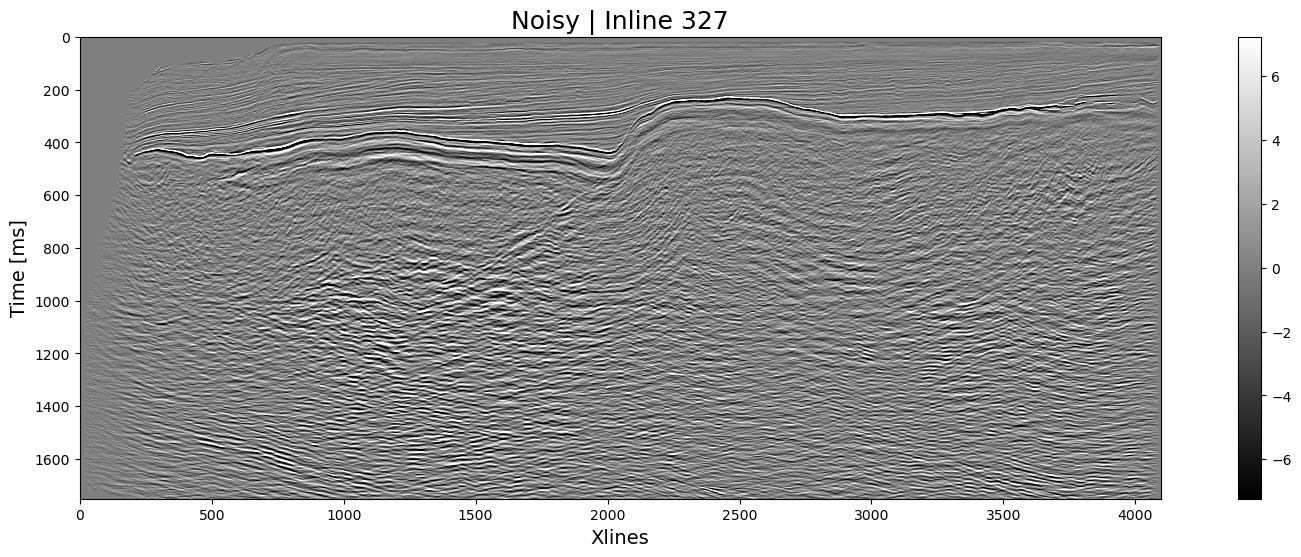

In [10]:
# Visualize the inline
plt.figure(figsize=(20, 6))
plt.imshow(cubeNoisy[iline, :, :].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
plt.colorbar()
plt.xlabel('Xlines', fontsize = 14)
plt.ylabel('Time [ms]', fontsize = 14)
plt.title('Noisy | Inline %d' %iline, fontsize = 18)
plt.savefig('/home/roderickperez/Documents/DS_Projects_Ubuntu/Denoising_Seismic_AutoEncoder/images/Noisy_Inline_%d.png' %iline)
plt.show()

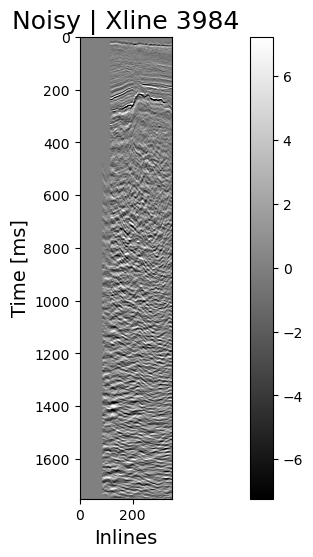

In [11]:
# Visualize the crossline
plt.figure(figsize=(20, 6))
plt.imshow(cubeNoisy[:, xline, :].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
plt.colorbar()
plt.xlabel('Inlines', fontsize = 14)
plt.ylabel('Time [ms]', fontsize = 14)
plt.title('Noisy | Xline %d' %xline, fontsize = 18)
plt.savefig('/home/roderickperez/Documents/DS_Projects_Ubuntu/Denoising_Seismic_AutoEncoder/images/Noisy_Xline_%d.png' %xline)
plt.show()

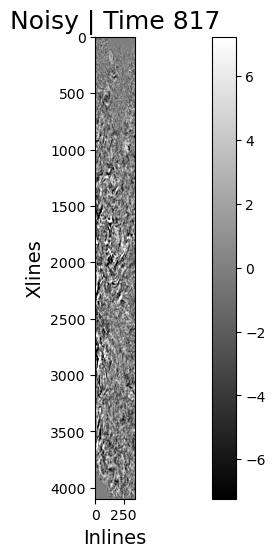

In [12]:
# Visualize the time slice
plt.figure(figsize=(20, 6))
plt.imshow(cubeNoisy[:, :, time].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)
plt.colorbar()
plt.xlabel('Inlines', fontsize = 14)
plt.ylabel('Xlines', fontsize = 14)
plt.title('Noisy | Time %d' %time, fontsize = 18)
plt.savefig('/home/roderickperez/Documents/DS_Projects_Ubuntu/Denoising_Seismic_AutoEncoder/images/Noisy_Xline_%d.png' %time)
plt.show()

---

### Visualize Patches

In [13]:
patchSize = 256

In [14]:
iline_num_patches = cubeNoisy.shape[0] // patchSize 
xline_num_patches = cubeNoisy.shape[1] // patchSize 
time_num_patches = cubeNoisy.shape[2] // patchSize 

In [15]:
print('Number of patches in the inline direction: %d' %iline_num_patches)
print('Number of patches in the crossline direction: %d' %xline_num_patches)
print('Number of patches in the time direction: %d' %time_num_patches)

Number of patches in the inline direction: 1
Number of patches in the crossline direction: 16
Number of patches in the time direction: 6


In [16]:
total_num_iline_patches = xline_num_patches*time_num_patches*cubeNoisy.shape[0]
total_num_xline_patches = iline_num_patches*time_num_patches*cubeNoisy.shape[1]
total_num_time_patches = iline_num_patches*xline_num_patches*cubeNoisy.shape[2]

In [17]:
print('Total number of patches in the inline direction: %d' %(total_num_iline_patches))
print('Total number of patches in the crossline direction: %d' %(total_num_xline_patches))
print('Total number of patches in the time direction: %d' %(total_num_time_patches))

Total number of patches in the inline direction: 33696
Total number of patches in the crossline direction: 24582
Total number of patches in the time direction: 28016


NameError: name 'row_num' is not defined

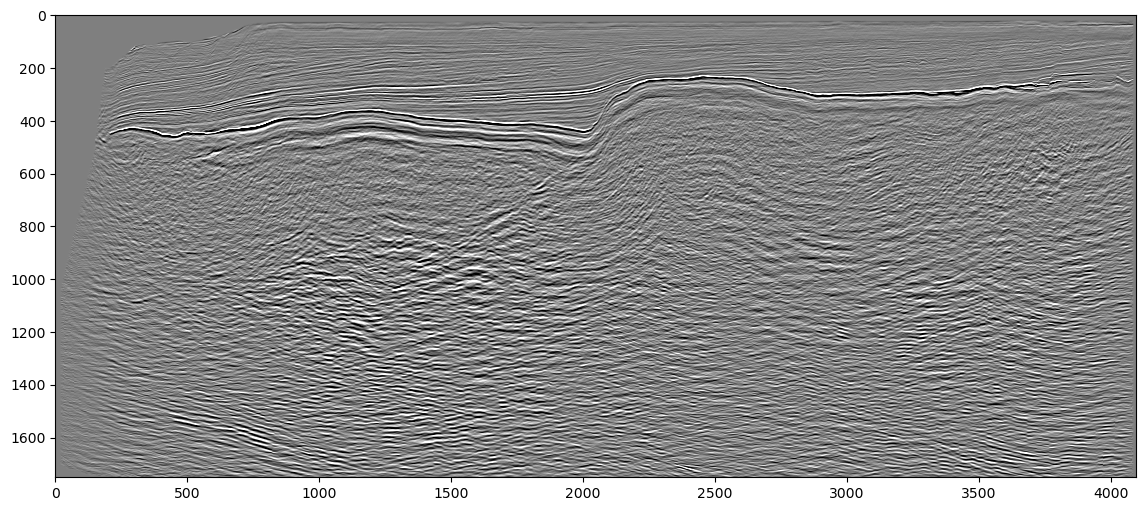

In [18]:
plt.figure(figsize=(20, 6))
plt.imshow(cubeNoisy[iline, :, :].T, cmap = 'gray', aspect='equal', vmin = -amplitude_max, vmax = amplitude_max)

for m in range(row_num):
    for n in range(col_num):
        i = m*patchSize+patchSize//2
        j = n*patchSize+patchSize//2
        rect = plt.Rectangle((m*patchSize, n*patchSize), patchSize, patchSize, linewidth=0.5, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        plt.text(i, j, str(m*col_num+n), color='r', fontsize=6, ha='center', va='center')

plt.xlabel('Xlines', fontsize = 14)
plt.ylabel('Time [ms]', fontsize = 14)
plt.title('Noisy | Inline %d' %iline, fontsize = 18)
plt.savefig('/home/roderickperez/Documents/DS_Projects_Ubuntu/Denoising_Seismic_AutoEncoder/images/2D_iline_noisyPatches.png', dpi = 500)
plt.show()